In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data

https://github.com/ishaghodgaonkar/emrbots/blob/master/100-Patients.zip

unzip it into the Data folder

In [1]:
# Import needed libraries
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt
from pandas.api.types import is_datetime64_any_dtype as is_datetime

In [2]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)
## This seems to have been pre filled in
admiss_core = pd.read_csv("../data/AdmissionsCorePopulatedTable.txt",sep="\t",index_col="PatientID")
admiss_diag_core = pd.read_csv("../data/AdmissionsDiagnosesCorePopulatedTable.txt",sep="\t",index_col="PatientID")
patient_core = pd.read_csv("../data/PatientCorePopulatedTable.txt",sep="\t",index_col="PatientID")
labs_core = pd.read_csv("../data/LabsCorePopulatedTable.txt",sep="\t",index_col="PatientID")

In [3]:
# 1) Is something missing here on instructions?
admiss_core, 
patient_core
labs_core

,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,URINALYSIS: RED BLOOD CELLS,1.8,rbc/hpf,1992-07-01 01:36:17.910
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: GLUCOSE,103.3,mg/dL,1992-06-30 09:35:52.383
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: MCH,35.8,pg,1992-06-30 03:50:11.777
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: CALCIUM,8.9,mg/dL,1992-06-30 12:09:46.107
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1992-07-01 01:31:08.677
...,...,...,...,...,...
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: HEMOGLOBIN,13.6,gm/dl,2012-04-21 03:23:50.883
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: MCH,26.2,pg,2012-04-21 03:18:44.127
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,METABOLIC: CHLORIDE,104.4,mmol/L,2012-04-21 02:58:57.840


In [4]:
# Dates!
## Check column types
labs_core.select_dtypes(include=[np.datetime64]) # No idea why patient id is coming up at datetime

""
PatientID
1A8791E3-A61C-455A-8DEE-763EB90C9B2C
1A8791E3-A61C-455A-8DEE-763EB90C9B2C
1A8791E3-A61C-455A-8DEE-763EB90C9B2C
1A8791E3-A61C-455A-8DEE-763EB90C9B2C
1A8791E3-A61C-455A-8DEE-763EB90C9B2C
...
F0B53A2C-98CA-415D-B928-E3FD0E52B22A
F0B53A2C-98CA-415D-B928-E3FD0E52B22A
F0B53A2C-98CA-415D-B928-E3FD0E52B22A


In [5]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type
## I think this was mistakenly predone
def convert_cols_to_datetime(df):
    for col in df:
        if "date" in col.lower() and type(df[col]) is not np.dtype('datetime64[ns]'):
            df[col] = pd.to_datetime(df[col])

In [6]:

# 1) 
convert_cols_to_datetime(admiss_core)
convert_cols_to_datetime(admiss_diag_core)
convert_cols_to_datetime(patient_core)
convert_cols_to_datetime(labs_core)

In [7]:
admiss_core.iloc[3]['AdmissionEndDate']-admiss_core.iloc[3]['AdmissionStartDate']

Timedelta('5 days 10:14:56.766000')

In [8]:
# As is typical in complex data sets, informtion about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# 7A025E77-7832-4F53-B9A7-09A3F98AC17E	
pid='7A025E77-7832-4F53-B9A7-09A3F98AC17E'
# Print the record in each table with this patientID
## admiss_core
admiss_core.loc[admiss_core.index==pid]

,AdmissionID,AdmissionStartDate,AdmissionEndDate
PatientID,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,2011-10-12 14:55:02.027,2011-10-22 01:16:07.557
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,1978-06-29 07:29:11.593,1978-07-10 04:05:51.787
7A025E77-7832-4F53-B9A7-09A3F98AC17E,2,1982-10-14 07:01:43.613,1982-10-21 16:44:00.310
7A025E77-7832-4F53-B9A7-09A3F98AC17E,3,1990-02-23 04:28:34.457,1990-03-13 15:55:29.837
7A025E77-7832-4F53-B9A7-09A3F98AC17E,4,1994-05-15 11:34:00.840,1994-05-19 23:04:04.877
7A025E77-7832-4F53-B9A7-09A3F98AC17E,5,2001-01-10 11:04:58.943,2001-01-27 00:54:18.730
7A025E77-7832-4F53-B9A7-09A3F98AC17E,6,2001-12-29 20:28:01.050,2002-01-18 18:16:04.423


In [9]:
## labs_core
labs_core.loc[labs_core.index==pid]

,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CARBON DIOXIDE,20.9,mmol/L,1978-06-29 22:56:25.430
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: BILI TOTAL,0.3,mg/dL,1978-06-30 00:55:28.273
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CALCIUM,7.4,mg/dL,1978-06-30 07:11:48.760
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: NEUTROPHILS,2.8,k/cumm,1978-06-30 00:01:24.477
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: MCHC,32.2,g/dl,1978-06-30 04:33:20.790
...,...,...,...,...,...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,METABOLIC: ALT/SGPT,65.9,U/L,2011-10-21 22:37:12.087
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: HEMOGLOBIN,11.6,gm/dl,2011-10-22 00:25:12.860
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: RDW,14.7,%,2011-10-21 21:29:42.703


In [10]:
## admiss_diag_core
admiss_diag_core.loc[admiss_diag_core.index==pid]

,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
PatientID,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,M05.442,Rheumatoid myopathy with rheumatoid arthritis ...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,2,F12.15,Cannabis abuse with psychotic disorder
7A025E77-7832-4F53-B9A7-09A3F98AC17E,3,E10.43,Type 1 diabetes mellitus with diabetic autonom...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,4,M12.162,"Kaschin-Beck disease, left knee"
7A025E77-7832-4F53-B9A7-09A3F98AC17E,5,T43.3X1,Poisoning by phenothiazine antipsychotics and ...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,6,C54.3,Malignant neoplasm of fundus uteri
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,F06.3,Mood disorder due to known physiological condi...


In [11]:
## patient_core
#patient_core.loc[admiss_core.index==pid]
patient_core.loc[patient_core.index==pid]

,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
PatientID,,,,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,Female,1951-07-12 08:23:45.520,Asian,Single,English,16.69


In [12]:
# SQL-like joins
jdf =  patient_core.join(labs_core, how='left')


In [13]:
jdf.shape, patient_core.shape, labs_core.shape

((111483, 11), (100, 6), (111483, 5))

In [14]:
# Holy cow!  this patient has lots of lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()
#
# Number of Labs per patient
print("Stats on Number of Labs per Patient")

## Group the labs table by patID and get the n per patient
labsGroup1 = jdf.groupby("PatientID").size()

## Create a pd dataframe to make it look nice
labStatsTbl1 = pd.DataFrame({
    'Index': ['SummaryStats'],
    'Mean': [labsGroup1.mean()],
    'Median': [labsGroup1.median()],
    'StandardDeviation': [labsGroup1.std()],
})

## Set the index for a small bit of readability
labStatsTbl1.set_index('Index', inplace=True)

# Show Results
labStatsTbl1

Stats on Number of Labs per Patient


,Mean,Median,StandardDeviation
Index,,,
SummaryStats,1114.83,1032.5,539.36152


In [15]:
#   2) Compute a list of each lab and how many orders for that lab are in the data frame
# Group by lab Name
labsGroup2 = jdf.groupby("LabName").size()

# Print a titble
print("Number of each lab")

# Sort values to see what was ordered most
labsGroup2.sort_values(ascending = False)

Number of each lab


LabName
CBC: NEUTROPHILS                 3224
URINALYSIS: WHITE BLOOD CELLS    3218
METABOLIC: CARBON DIOXIDE        3218
CBC: HEMATOCRIT                  3211
CBC: ABSOLUTE NEUTROPHILS        3210
CBC: WHITE BLOOD CELL COUNT      3209
METABOLIC: SODIUM                3207
CBC: MCHC                        3202
METABOLIC: GLUCOSE               3202
METABOLIC: ALBUMIN               3202
CBC: HEMOGLOBIN                  3193
METABOLIC: CREATININE            3193
CBC: MCH                         3191
CBC: EOSINOPHILS                 3191
METABOLIC: CHLORIDE              3190
CBC: RDW                         3188
URINALYSIS: PH                   3187
URINALYSIS: RED BLOOD CELLS      3187
METABOLIC: POTASSIUM             3185
METABOLIC: BILI TOTAL            3182
URINALYSIS: SPECIFIC GRAVITY     3181
METABOLIC: AST/SGOT              3179
METABOLIC: CALCIUM               3179
METABOLIC: TOTAL PROTEIN         3177
CBC: PLATELET COUNT              3177
CBC: MEAN CORPUSCULAR VOLUME     3175
CBC:

Patient with the most labs: 80D356B4-F974-441F-A5F2-F95986D119A2


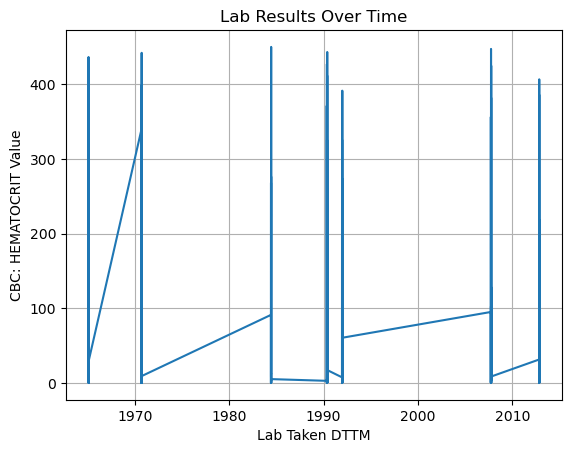

In [17]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#   1) Find the patient/lab combination with the most labs taken
## Group by both patient to find the pat with the most labs
jdf.groupby(["PatientID"]).size().sort_values(ascending = False)

## Filter data to this patient
pt_most_labs = '80D356B4-F974-441F-A5F2-F95986D119A2'
labPat1 = jdf.loc[jdf.index==pt_most_labs]

## Group By to find the most taken lab
labPat1.groupby(["LabName"]).size().sort_values(ascending = False)

print(f"Patient with the most labs: {pt_most_labs}")

#   2) For the most-measured patient/lab combination, make a time vs lab-value plot
#    Hint:  you can "group by" multiple columns
plt.figure()
plt.plot(labPat1['LabDateTime'], labPat1['LabValue'])
plt.xlabel('Lab Taken DTTM')
plt.ylabel('CBC: HEMATOCRIT Value')
plt.title('Lab Results Over Time')
plt.grid(True)  # Optional: Add grid lines
plt.show()

In [ ]:
# 1) This Section doesn't seem to be asking anything
#jdf.groupby(['PatientID','LabName']).size().sort_values()


In [19]:
thebusypatient = '80D356B4-F974-441F-A5F2-F95986D119A2' # put patient ID here
thebusylab = 'CBC: HEMATOCRIT' #put the lab name here
subdf = jdf.loc[(jdf.index==thebusypatient) & (jdf.LabName.str.startswith(thebusylab))]

In [ ]:
# 2)  This Section doesn't seem to be asking anything
#%matplotlib widget
#dts = ...
#vls = ...

#plt.figure()
#plt.plot(dts, vls)

In [ ]:
##################################################################################################################
#
# You do:
#   Closely inspect the plot you made.  
#
# 1) In order to compare this to another data set, your PI wants to know what the lab value was on August 6, 1985.  
#    What would you tell him/her (including all caveats)?
#
# 2) How about the value for December 14, 1991?

In [20]:
# figure out if there was a lab value on august 6th 1985
subdf[subdf['LabDateTime'].dt.year == 1985] # No values in 1985

# Figure out if there is a value for December 14, 1991
subdf[(subdf['LabDateTime'].dt.year == 1991) & (subdf['LabDateTime'].dt.month == 12)] # No lab values for this date either

,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,,,,,,,
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,5,CBC: HEMATOCRIT,33.8,%,1991-12-11 15:08:16.110
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,5,CBC: HEMATOCRIT,50.4,%,1991-12-13 20:43:18.380
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,5,CBC: HEMATOCRIT,45.8,%,1991-12-15 06:45:36.817
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,5,CBC: HEMATOCRIT,51.9,%,1991-12-15 18:22:43.330
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,5,CBC: HEMATOCRIT,45.5,%,1991-12-17 02:17:53.717
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,5,CBC: HEMATOCRIT,33.6,%,1991-12-17 21:44:48.287
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,5,CBC: HEMATOCRIT,31.1,%,1991-12-18 23:22:54.957
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,5,CBC: HEMATOCRIT,45.8,%,1991-12-19 13:38:13.837
80D356B4-F974-441F-A5F2-F95986D119A2,Female,1938-03-06 18:24:18.297,White,Single,English,18.88,5,CBC: HEMATOCRIT,49.4,%,1991-12-20 19:18:49.647


In both cases, there wasn't a lab value. This kind of situation can get into the realm of "How to handle missing data." However, in this case, and with no subject matter expertise, I recommend not filling in missing data here as it doesn't seem appropriate. Though there is a use case for everything, the PI may have a good reason, particularly in the 2nd case where a patient has a value on either date of the missing value). If the PI found it relevant, I would ask how they want the data imputated (Fill in missing values with median, repeat the previous value, bring back the next value, or other ways). 